In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
import os
print(os.getcwd())
os.chdir("/Users/terminator/Desktop/Trading/")

'/Users/terminator/Desktop/Trading/NSE Analysis'

In [7]:
nifty50_wk = pd.read_csv("Nifty 50 Historical Data Weekly Gain 2017-2021.csv")
nifty50_wk

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 05, 2021","17,496.85","17,203.60","17,539.80","16,895.75",257.79M,1.75%
1,"Nov 28, 2021","17,196.70","17,055.80","17,489.80","16,782.40",1.71B,1.00%
2,"Nov 21, 2021","17,026.45","17,796.25","17,805.25","16,985.70",1.58B,-4.16%
3,"Nov 14, 2021","17,764.80","18,140.95","18,210.15","17,688.50",1.12B,-1.87%
4,"Nov 07, 2021","18,102.75","18,040.20","18,123.00","17,798.20",1.35B,1.04%
...,...,...,...,...,...,...,...
253,"Jan 29, 2017","8,740.95","8,635.55","8,757.60","8,537.50",1.68B,1.15%
254,"Jan 22, 2017","8,641.25","8,329.60","8,672.70","8,327.20",971.14M,3.50%
255,"Jan 15, 2017","8,349.35","8,390.95","8,460.30","8,340.95",802.44M,-0.61%
256,"Jan 08, 2017","8,400.35","8,259.35","8,461.05","8,227.75",810.71M,1.90%


In [ ]:
#https://stackoverflow.com/questions/65323421/python-investpy-package-to-get-data-of-nifty50-index-get-stock-historical-dat

In [209]:
class European_Call_Payoff:

    def __init__(self, strike):
        self.strike = strike

    def get_payoff(self, stock_price):
        if stock_price > self.strike:
            return stock_price - self.strike
        else:
            return 0


class GeometricBrownianMotion:

    def simulate_paths(self):
        while(self.T - self.dt > 0):
            dWt = np.random.normal(0, math.sqrt(self.dt))  # Brownian motion
            dYt = self.drift*self.dt + self.volatility*dWt  # Change in price
            self.current_price += dYt  # Add the change to the current price
            self.prices.append(self.current_price)  # Append new price to series
            self.T -= self.dt  # Accound for the step in time

    def __init__(self, initial_price, drift, volatility, dt, T):
        self.current_price = initial_price
        self.initial_price = initial_price
        self.drift = drift
        self.volatility = volatility
        self.dt = dt
        self.T = T
        self.prices = []
        self.simulate_paths()

In [237]:
# Model Parameters
paths = 200
initial_price = 17816
drift = -16
volatility = 0.08*initial_price
dt = 1/(365*24)
T = dt*24*3
price_paths = []


# Generate a set of sample paths
for i in range(0, paths):
    price_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)


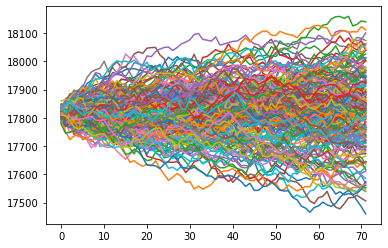

52.239899214802314


In [238]:
call_payoffs = []
ec = European_Call_Payoff(initial_price)
risk_free_rate = .036*T
for price_path in price_paths:
    call_payoffs.append(ec.get_payoff(price_path[-1])/(1 + risk_free_rate))  # We get the last stock price in the series generated by GBM to determin the payoff and discount it by one year

# Plot the set of generated sample paths
for price_path in price_paths:
    plt.plot(price_path)
plt.show()

print(np.average(call_payoffs))  # Options are in blocks of 100


In [239]:

import math
from scipy.stats import norm


class EuropeanCall:

    def call_price(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log(asset_price/(b*strike_price)) + .5*(asset_volatility*asset_volatility)*time_to_expiration
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        z1 = z1*asset_price
        x2 = math.log(asset_price/(b*strike_price)) - .5*(asset_volatility*asset_volatility)*time_to_expiration
        x2 = x2/(asset_volatility*(time_to_expiration**.5))
        z2 = norm.cdf(x2)
        z2 = b*strike_price*z2
        return z1 - z2

    def __init__(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        self.asset_price = asset_price
        self.asset_volatility = asset_volatility
        self.strike_price = strike_price
        self.time_to_expiration = time_to_expiration
        self.risk_free_rate = risk_free_rate
        self.price = self.call_price(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate)
        

class EuropeanPut:

    def put_price(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        b = math.exp(-risk_free_rate*time_to_expiration)
        x1 = math.log((b*strike_price)/asset_price) + .5*(asset_volatility*asset_volatility)*time_to_expiration
        x1 = x1/(asset_volatility*(time_to_expiration**.5))
        z1 = norm.cdf(x1)
        z1 = b*strike_price*z1
        x2 = math.log((b*strike_price)/asset_price) - .5*(asset_volatility*asset_volatility)*time_to_expiration
        x2 = x2/(asset_volatility*(time_to_expiration**.5))
        z2 = norm.cdf(x2)
        z2 = asset_price*z2
        return z1 - z2

    def __init__(
        self, asset_price, asset_volatility, strike_price,
        time_to_expiration, risk_free_rate
            ):
        self.asset_price = asset_price
        self.asset_volatility = asset_volatility
        self.strike_price = strike_price
        self.time_to_expiration = time_to_expiration
        self.risk_free_rate = risk_free_rate
        self.price = self.put_price(asset_price, asset_volatility, strike_price, time_to_expiration, risk_free_rate)
        
ec = EuropeanCall(17416, 0.175, 17600, 1.8/365, 0.036)
print(ec.price)

24.05560406789209


In [240]:
# importing nse from nse tools
from nsetools import Nse

# creating a Nse object
nse = Nse()

# getting quote of the sbin
quote = nse.get_quote('sbin')

# printing company name
print(quote['companyName'])

# printing buy price
print("Buy Price : " + str(quote['buyPrice1']))


ModuleNotFoundError: No module named 'nsetools'

In [241]:
#!pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36083 sha256=8ff027ffb3d4aa66cea98789b425f76d4a16df05f78b011da77749ef6ec49059
  Stored in directory: /Users/terminator/Library/Caches/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


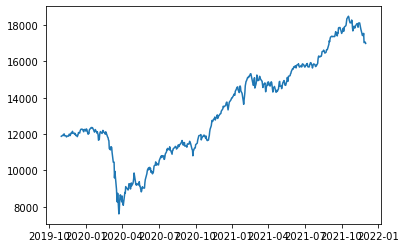

In [4]:
from nsepy import get_history
from datetime import date
data = get_history(symbol="NIFTY 50", start=date(2019,10,31), end=date(2021,11,30), index = True)
plt.plot(data[['Close']])

In [298]:
data["DayOfWeek"] = data.index.to_series().dt.dayofweek

In [299]:
data

,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,
2021-01-01,73.089203,73.319801,73.025002,73.089203,0,4
2021-01-04,73.092003,73.200996,72.798500,73.092003,0,0
2021-01-05,73.091499,73.329803,72.963501,73.320000,0,1
2021-01-06,73.167999,73.360001,73.040001,73.374802,0,2
2021-01-07,73.374802,73.467003,73.063004,73.360001,0,3
...,...,...,...,...,...,...
2021-11-19,74.175697,74.482803,74.157997,74.174400,0,4
2021-11-22,74.310699,74.734398,74.265503,74.302597,0,0
2021-11-23,74.429802,74.581497,74.359001,74.429802,0,1


In [8]:
nifty_opt = get_history(symbol="NIFTY",
                        start=date(2015,1,1),
                        end=date(2021,12,15),
                        index=True,
                        option_type='CE',
                        strike_price=18000,
                        expiry_date=date(2021,12,30))

In [9]:
nifty_opt[nifty_opt['Number of Contracts']>100][-50:] 
#[["Open", "Low", "Close", "High"]].mean(axis=1)[-50:]#.hist(bins =100)

,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Premium Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,,,,
2021-09-29,NIFTY,2021-12-30,CE,18000.0,504.20,562.50,500.45,534.60,538.45,534.60,2630,2.436735e+09,69735000.0,837125,30150,17711.30
2021-09-30,NIFTY,2021-12-30,CE,18000.0,530.00,549.00,468.55,478.05,481.20,478.05,1939,1.794166e+09,49066000.0,851850,14725,NaN
2021-10-01,NIFTY,2021-12-30,CE,18000.0,413.10,447.35,377.00,394.80,392.65,394.80,5858,5.389405e+09,117205000.0,961000,109150,NaN
2021-10-04,NIFTY,2021-12-30,CE,18000.0,412.75,466.05,408.00,435.35,439.00,435.35,3141,2.895806e+09,68906000.0,1002400,41400,NaN
2021-10-05,NIFTY,2021-12-30,CE,18000.0,400.05,490.00,400.00,484.10,490.00,484.10,2497,2.302694e+09,55394000.0,1004800,2400,NaN
2021-10-06,NIFTY,2021-12-30,CE,18000.0,495.35,499.90,401.05,409.65,402.00,409.65,3176,2.930195e+09,71795000.0,1025150,20350,NaN
2021-10-07,NIFTY,2021-12-30,CE,18000.0,450.00,508.55,442.55,469.90,476.05,469.90,2580,2.383983e+09,61983000.0,1026600,1450,NaN
2021-10-08,NIFTY,2021-12-30,CE,18000.0,485.65,526.15,477.05,506.70,511.00,506.70,3090,2.858686e+09,77686000.0,1025400,-1200,NaN
2021-10-11,NIFTY,2021-12-30,CE,18000.0,486.00,584.00,486.00,542.20,545.00,542.20,2581,2.394382e+09,71482000.0,1026025,625,17945.95


In [272]:
#!pip install forex-python

     |████████████████████████████████| 74 kB 1.4 MB/s eta 0:00:011


In [279]:
import datetime
from forex_python.converter import CurrencyRates
c = CurrencyRates()
date_obj = datetime.datetime(2014, 5, 23, 18, 36, 28, 151012)
c.get_rate('USD', 'INR', date_obj)

58.50858400586941

In [ ]:
#!pip install yfinance
import yfinance as yf  
import matplotlib.pyplot as plt

data = yf.download('BTC-USD','2021-01-01','2021-09-30')
data.head()

Exception in thread Thread-92:
Traceback (most recent call last):
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 170, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 96, in create_connection
    raise err
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 60] Operation timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 706, in urlopen
    chunked=chunked,
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "/Users/terminator/opt/a

In [283]:
data = yf.download('USDINR=X','2021-01-01','2021-09-30')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,73.134003,73.349998,72.946602,73.134003,73.134003,0
2021-01-01,73.089203,73.319801,73.025002,73.089203,73.089203,0
2021-01-04,73.092003,73.200996,72.798500,73.092003,73.092003,0
2021-01-05,73.091499,73.329803,72.963501,73.320000,73.320000,0
2021-01-06,73.167999,73.360001,73.040001,73.374802,73.374802,0


In [284]:
data = yf.download('BZ=F','2021-01-01','2021-09-30')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,51.660000,53.320000,50.580002,51.090000,51.090000,50232
2021-01-05,50.740002,53.880001,50.619999,53.599998,53.599998,62791
2021-01-06,53.590000,54.720001,53.150002,54.299999,54.299999,49186
2021-01-07,54.139999,54.900002,53.939999,54.380001,54.380001,30800
2021-01-08,54.459999,56.299999,54.360001,55.990002,55.990002,37597


In [ ]:
import yfinance as yf

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "INR=X",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

print(data)

In [11]:
#!pip install investpy

     |████████████████████████████████| 4.4 MB 725 kB/s eta 0:00:01
     |████████████████████████████████| 235 kB 930 kB/s eta 0:00:01
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=5160e36a4e7de5cb266278002694a9a5e6eec83ad280c329b83425a9ca42161b
  Stored in directory: /Users/terminator/Library/Caches/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy


In [13]:
import investpy

data = investpy.economic_calendar(
    from_date='12/09/2021',
    to_date  ='15/12/2021'
)

print(data.head())

       id        date   time                  zone currency importance  \
0  436810  12/09/2021  12:29  united arab emirates      AED        low   
1  435581  13/09/2021  04:15           new zealand      NZD        low   
2  435584  13/09/2021  05:20                 japan      JPY     medium   
3  435583  13/09/2021  05:20                 japan      JPY        low   
4  435582  13/09/2021  05:20                 japan      JPY        low   

                                      event  actual forecast previous  
0         Private Sector Loans (YoY)  (Jul)  -1.80%     None   -1.20%  
1                          FPI (MoM)  (Aug)    0.3%     None     1.3%  
2  BSI Large Manufacturing Conditions  (Q3)     7.0     None     -1.4  
3                          PPI (YoY)  (Aug)    5.5%     5.6%     5.6%  
4                          PPI (MoM)  (Aug)    0.0%     0.2%     1.1%  


In [23]:
data[data.importance.isin(["medium", "high"])]

,id,date,time,zone,currency,importance,event,actual,forecast,previous
2,435584,13/09/2021,05:20,japan,JPY,medium,BSI Large Manufacturing Conditions (Q3),7.0,None,-1.4
5,436812,13/09/2021,11:00,united kingdom,GBP,medium,Investing.com GBP/USD Index,32.2%,None,34.8%
6,436818,13/09/2021,11:00,united states,USD,medium,Investing.com Gold Index,55.7%,None,55.4%
7,436819,13/09/2021,11:00,united states,USD,medium,Investing.com S&P 500 Index,40.9%,None,33.3%
8,436813,13/09/2021,11:00,canada,CAD,medium,Investing.com USD/CAD Index,39.8%,None,46.8%
...,...,...,...,...,...,...,...,...,...,...
7779,442204,15/12/2021,21:00,united states,USD,high,Crude Oil Inventories,-4.584M,-2.082M,-0.240M
7932,442207,15/12/2021,21:00,united states,USD,medium,Cushing Crude Oil Inventories,1.294M,None,2.373M
7939,442382,15/12/2021,21:30,russia,RUB,medium,GDP Quarterly (YoY) (Q3),None,4.3%,4.3%
7940,441337,15/12/2021,22:00,israel,ILS,medium,CPI (MoM) (Nov),None,0.0%,0.1%


In [53]:
data.importance

0          low
1          low
2       medium
3          low
4          low
         ...  
8089      None
8090      None
8091      None
8092      None
8093      None
Name: importance, Length: 8094, dtype: object

In [52]:
20000*2**10

20480000

In [39]:
# If liquidity dries market falls - No chance Nifty will get to 19000 by Jan
# But Nifty can go to 18000 by March

687.5

In [55]:
# What is the probability that from this point the index moves to what % atleast once

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "INR=X",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
    
data

Exception in thread Thread-91:
Traceback (most recent call last):
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 170, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 96, in create_connection
    raise err
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 60] Operation timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 706, in urlopen
    chunked=chunked,
  File "/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "/Users/terminator/opt/a

KeyboardInterrupt: 